In [1]:
import os
import pandas as pd

In [2]:
df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')

files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.head()

all_months_data.to_csv("all_data.csv", index=False)


In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
### Data with columns

In [5]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df
all_data = all_data.dropna(how='all')
all_data.head(10)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


In [6]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data['Month'] = all_data['Order Date'].str[:2]
all_data['Month'] = all_data['Month'].astype('int32')

In [7]:
### What was the best months for sales? How much was earned that month?

In [8]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [9]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [10]:
## Add a sales column


In [11]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [12]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [13]:
### What was the best months for sales? How much was earned that month?

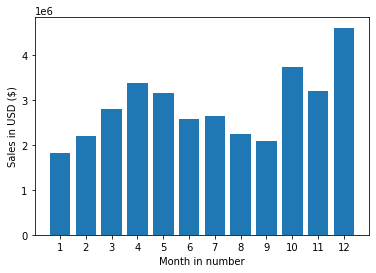

In [14]:
results = all_data.groupby('Month').sum()
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month in number')
plt.show()

In [15]:
### city with the highest sales

In [21]:
##1- add city column
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])

In [20]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Column,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles


In [32]:
city_result = all_data.groupby('City').sum()
city_result

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta,16602,2779908.20,104794,2795498.58
Austin,11153,1809873.61,69829,1819581.75
Boston,22528,3637409.77,141112,3661642.01
Dallas,16730,2752627.82,104620,2767975.40
Los Angeles,33289,5421435.23,208325,5452570.80
New York City,27932,4635370.83,175741,4664317.43
Portland,14053,2307747.47,87765,2320490.61
San Francisco,50239,8211461.74,315520,8262203.91
Seattle,16553,2733296.01,104941,2747755.48


<bound method GroupBy.sum of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000020AF571EDC0>>
